# Kmeans

##### Kmeans algoritması verileri gruplaştırmak için kullanılan bir unsupervised makine öğrenmesi algoritmasıdır. Verinin kaç gruba ayrılacağının parametresi verilir ve datadan bu sayı kadar rastgele eleman seçilir. Bu elemanlara en yakın elemanlar seçilerek ve veriler label'lanarak gruplanırlar. Sonrasında gruplanan bu elemanların ortalamaları alınır ve bunlar yeni seçilen noktalar olur. Tekrarn bu yeni seçilen noktalara yakın noktalarak seçilerek işlem devam eder. Algoritma verilen loss mikktarından düşük olduğu zaman durur. 

##### Kmeans algoritması kimi zaman rastgele seçilen noktalardan dolayı yanlış grupllandırma yapabilir o yüzden işlemi birden fazla epoch'da gerçekleştirmek daha uygundur 

##### Eğer veri gözle görülür bir biçimde gruplanabilir değilse bu durumda elbow yöntemi kullanılarak optimum grup sayısı bulunur. Bu yöntemle loss miktarının azalma hızının azaldığı değer grupp sayısı olarak seçilir.

In [1]:


import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt





data = pd.read_csv('dava.csv')


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def ElbowCheck(string):
    X = data[[string]].values
    wcv = []  
    K_range = range(1, 10)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(X)
        wcv.append(kmeans.inertia_)  

    plt.plot(K_range, wcv, 'bo-')
    plt.xlabel("Küme Sayısı (k)")
    plt.ylabel("Küme İçi Hata (WCV)")
    plt.title(f"Elbow Yöntemi ({string})")
    plt.show()

def KmeansAlgo(optimal_k, string):
    X = data[[string]].values  
    kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
    data["cluster"] = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_

    print(data)
    print("Küme Merkezleri:\n", centroids)
    plt.figure(figsize=(8,5))
    for cluster in range(optimal_k):
        plt.scatter(data[data["cluster"]==cluster][string], 
                    [0]*len(data[data["cluster"]==cluster]),  
                    label=f'Cluster {cluster}')
    plt.scatter(centroids, [0]*len(centroids), color='black', marker='x', s=100, label='Centroids')
    plt.xlabel(string)
    plt.title(f'K-Means Clustering ({string})')
    plt.legend()
    plt.show()

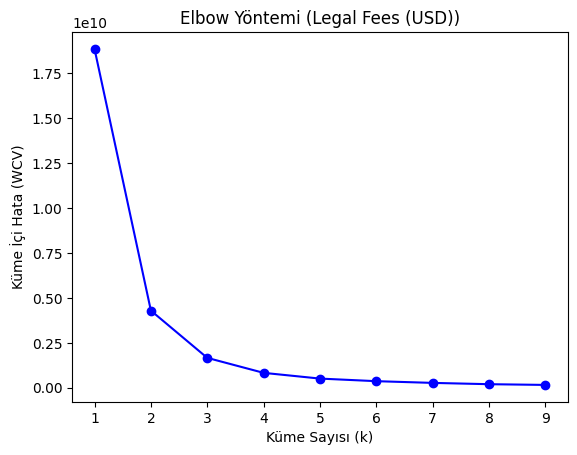

In [2]:
ElbowCheck("Legal Fees (USD)")

##### Burada davaların maliyetleri baz alınarak elbow yöntemi uygulanmış ve optimum grup sayısının 3 olduğu belirlenmiştir. Harcamalara  göre gruplandırma yaparak davaların gruplandırılması prtaik gözükmüştür ama algoritmalar istenilen her değer için elbow ve kmeans yapılabilecek şekilde yazılmıştır.

    Unnamed: 0  Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
0            0                   132                    8             35206   
1            1                   300                   12             46106   
2            2                   136                    2             16411   
3            3                   101                    1              7911   
4            4                   218                   16              6734   
..         ...                   ...                  ...               ...   
95          95                   260                   16             48525   
96          96                    70                    3             37635   
97          97                    57                    4             38828   
98          98                   164                   19             23711   
99          99                   230                    3              8420   

    Number of Evidence Items  Severity  Outcome  cl

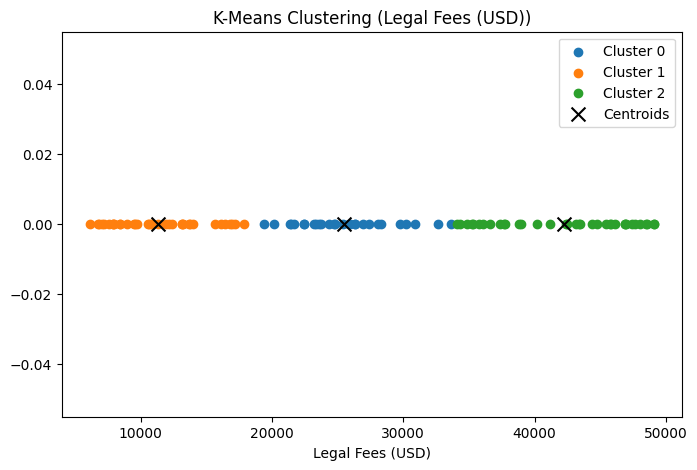

In [5]:
KmeansAlgo(3,"Legal Fees (USD)")

##### Buradan az,orta ve çok maliyetli davaları görüntüleyebiliriz. Algoritma gruplandırma yaparken az,orta ve çok yüksek maliyet sınırlarını bizim için belirlemiş ve olabilecek en iyi gruplandırmayı göstermiştir